# Customer Churn

Este notebook tem como objetivo realizar um estudo sobre quais os fatores que levam à rotatividade de clientes numa empresa de telefonia.

Além disso, serão criados alguns modelos de Machine Learning para prever se um dado cliente é propenso à rotatividade ou não. O objetivo é alcançar a casa dos 80% de precisão do modelo.

## Importação dos Dados e Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('projeto4_telecom_treino.csv', index_col='index')
test_data = pd.read_csv('projeto4_telecom_teste.csv', index_col='index')

data.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
index,,,,,,,,,,,,,,,,,,,,
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

Nosso Dataset não possui valores missing e todas as variáveis estão tipadas corretamente.

## Análise Exploratória

In [5]:
colors = {'no':'salmon', 'yes':'skyblue'}
cols_to_drop = list()

### State

In [6]:
pd.crosstab(index=data.churn,
            columns=data.state,
            margins=True,
            normalize='columns')

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
churn,,,,,,,,,,,,,,,,,,,,,
no,0.942308,0.9,0.8,0.9375,0.735294,0.863636,0.837838,0.907407,0.852459,0.873016,...,0.90566,0.75,0.861111,0.935065,0.890411,0.787879,0.910256,0.90566,0.883117,0.855086
yes,0.057692,0.1,0.2,0.0625,0.264706,0.136364,0.162162,0.092593,0.147541,0.126984,...,0.09434,0.25,0.138889,0.064935,0.109589,0.212121,0.089744,0.09434,0.116883,0.144914


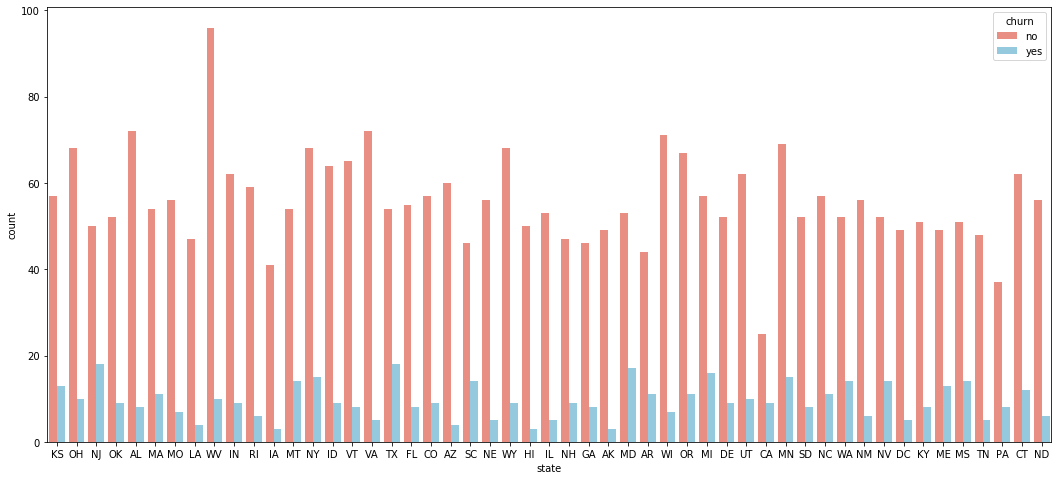

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(x='state', hue='churn', data=data, palette=colors)
plt.show()

Como existe uma certa variação na probabilidade na rotatividade do cliente baseado no estado no qual o mesmo reside,
a variável 'state' pode contribuir na construção no modelo.

### Account_length

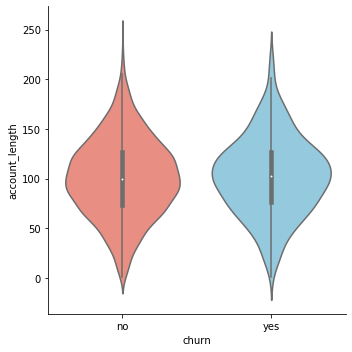

In [8]:
sns.catplot(x='churn', y='account_length', data=data, kind='violin', palette=colors);

No violin plot é perceptível que as medianas, os quartis e as distribuições da variável 'account_length' para os casos positivos e negativos de rotatividade são praticamente os mesmos. Logo, podemos concluir que esta é uma variável que não agrega nenhuma informação.

In [9]:
cols_to_drop.append('account_length')

### Internationl Plan

In [10]:
pd.crosstab(index=data.churn,
            columns=data.international_plan,
            margins=True,
            normalize='columns')

international_plan,no,yes,All
churn,,,
no,0.88505,0.575851,0.855086
yes,0.11495,0.424149,0.144914


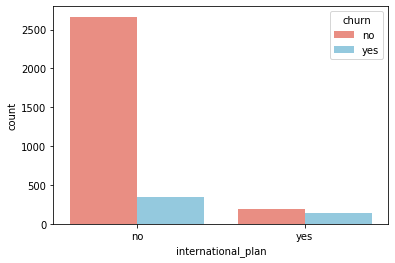

In [11]:
sns.countplot(x="international_plan", hue="churn", data=data, palette=colors);

De acordo com a tabela de frequências e o gráfico, podemos concluir que, dentre os clientes que
não possuem um plano internacioanl, a probabilidade de eles não deixarem a empresa é de quase 90%.
Enquanto que, dentre os clientes que possuem plano internacioanl, a probabilidade beira os 60%.
Dada esta diferença entre as probabilidades, concluimos que possuir ou não um plano internacional pode ser um fator relevante
para determinar a rotatividade dos clientes.

### Voice Mail Plan

Vamos seguir a mesma linha de raciocínio para a variável 'voice_mail_plan'.

In [12]:
pd.crosstab(index=data.churn,
            columns=data.voice_mail_plan,
            margins=True,
            normalize='columns')

voice_mail_plan,no,yes,All
churn,,,
no,0.832849,0.913232,0.855086
yes,0.167151,0.086768,0.144914


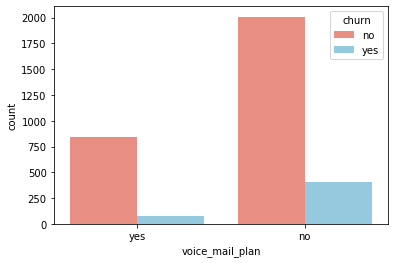

In [13]:
sns.countplot(x="voice_mail_plan", hue="churn", data=data, palette=colors);

No caso da variável 'voice_mail_plan' podemos notar que mesmo que um dado cliente tenha
adquirido ou não o plano, a probabilidade de ele não estar sujeito à rotatividade é quase a mesma:
aproximadamente 91% e 83%, respectivamente. Ou seja, tanto os clientes que adquiriram o plano,
quanto os que não adquiriram, provavelmente continuarão a ser clientes. Assim, podemos concluir que esta
variável não agrega informação sobre a rotatividade de clientes.

In [14]:
cols_to_drop.append('voice_mail_plan')

### Area Code

In [15]:
pd.crosstab(index=data.churn,
            columns=data.area_code,
            margins=True,
            normalize='columns')

area_code,area_code_408,area_code_415,area_code_510,All
churn,,,,
no,0.854415,0.857402,0.85119,0.855086
yes,0.145585,0.142598,0.14881,0.144914


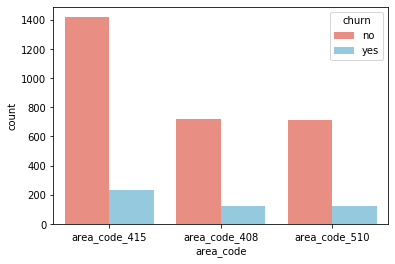

In [16]:
sns.countplot(x='area_code', hue='churn', data=data, palette=colors);

Pelo mesmo motivo que a variável 'voice_mail_plan', esta variável será desconsiderada.

In [17]:
cols_to_drop.append('area_code')

### Number_vmail_messages

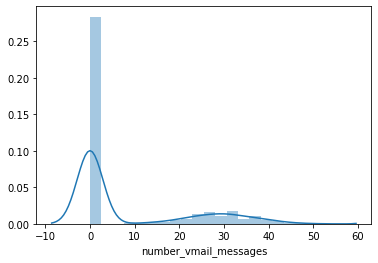

In [18]:
sns.distplot(data.number_vmail_messages);

In [19]:
# Representação percentual da quantidade de valores zero na variável 'number_vmail_messages'
nvm0 = round(data[data.number_vmail_messages == 0].number_vmail_messages.count() / data.number_vmail_messages.count() * 100, 2)
print("Percental 'number_vmail_messages' = 0: {}%".format(nvm0))

Percental 'number_vmail_messages' = 0: 72.34%


Como esta variável apresenta cerca de 72% de valores zerados, ela não será usada para realizar a análise.

In [20]:
cols_to_drop.append('number_vmail_messages')

### Totals per day

Vamos analisar as variáveis que trazem informações diárias.

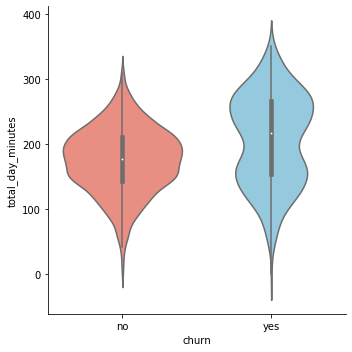

In [21]:
sns.catplot(x='churn', y='total_day_minutes', data=data, kind='violin', palette=colors);

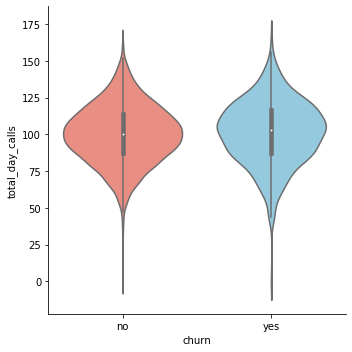

In [22]:
sns.catplot(x='churn', y='total_day_calls', data=data, kind='violin', palette=colors);

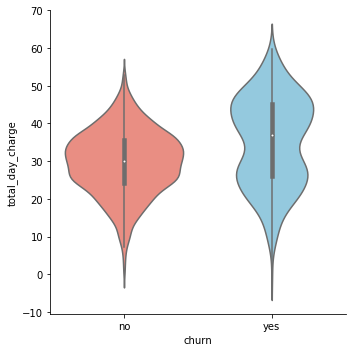

In [23]:
sns.catplot(x='churn', y='total_day_charge', data=data, kind='violin', palette=colors);

Podemos notar que as variáveis 'total_day_minutes' e 'total_day_charge' possuem um comportamento semelhante. Vamos exeplicar este comportamento com a variável 'total_day_minutes'.

Nos casos em que não há rotatividade a maioria das ligações possuem entre 150 a 200 minutos, justo onde existe um baixo volume de ligações de clientes que deixaram a empresa. Nos casos em que há rotatividade, a maior parte das ligações estão nos 150 minutos e, principalmente, entre os 250 a 300 minutos.

Conlcuimos que, possivelmente, 'total_day_minutes' e 'total_day_charge' são variáveis que adicionam alguma informação ao conjunto de dados.

Além disso, iremos descartar a variável 'total_day_calls' pelos mesmos motivos que a variável 'account_length': as medianas, os quartis e as distribuições são semelhantes em ambos os casos de churn.

In [24]:
cols_to_drop.append('total_day_calls')

### Totals per evening

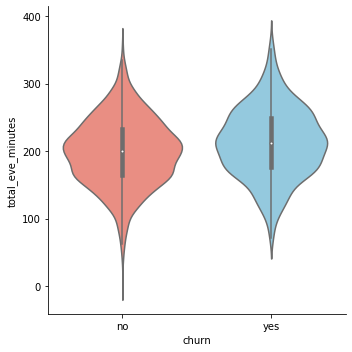

In [25]:
sns.catplot(x='churn', y='total_eve_minutes', data=data, kind='violin', palette=colors);

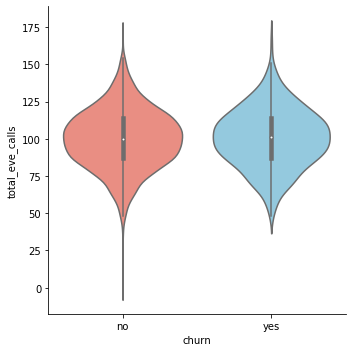

In [26]:
sns.catplot(x='churn', y='total_eve_calls', data=data, kind='violin', palette=colors);

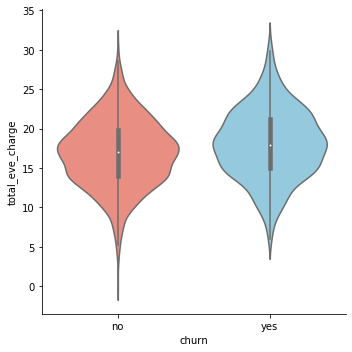

In [27]:
sns.catplot(x='churn', y='total_eve_charge', data=data, kind='violin', palette=colors);

### Totals per night

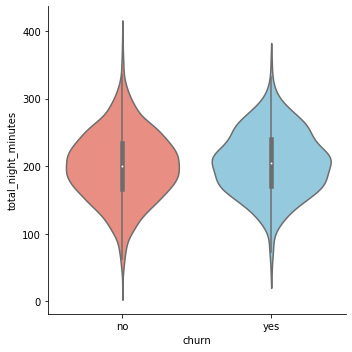

In [28]:
sns.catplot(x='churn', y='total_night_minutes', data=data, kind='violin', palette=colors);

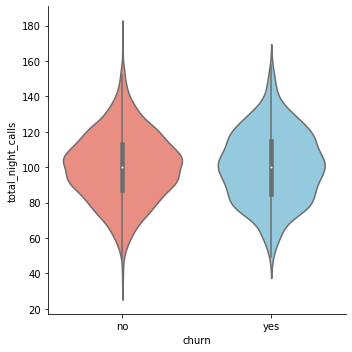

In [29]:
sns.catplot(x='churn', y='total_night_calls', data=data, kind='violin', palette=colors);

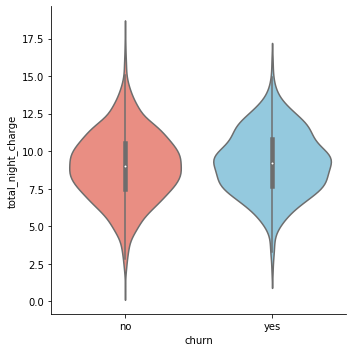

In [30]:
sns.catplot(x='churn', y='total_night_charge', data=data, kind='violin', palette=colors);

### Totals international calls

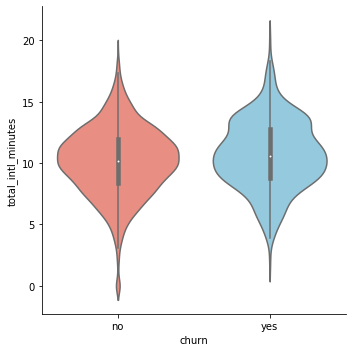

In [31]:
sns.catplot(x='churn', y='total_intl_minutes', data=data, kind='violin', palette=colors);

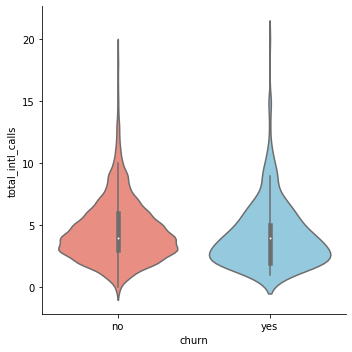

In [32]:
sns.catplot(x='churn', y='total_intl_calls', data=data, kind='violin', palette=colors);

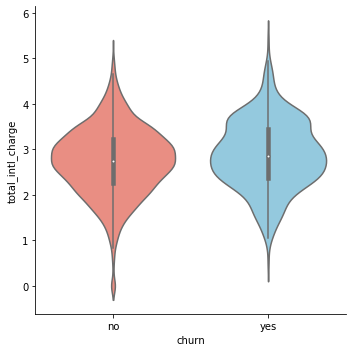

In [33]:
sns.catplot(x='churn', y='total_intl_charge', data=data, kind='violin', palette=colors);

Todas as variáveis referentes à ligações no período da tarde, de noite ou ligações internacionais, sofrem do mesmo problema que a variável 'account_length': as medianas, os quartis e as distribuições são semelhantes em ambos os casos de churn. Assim, iremos descartar todas elas.

In [34]:
cols = ['total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
        'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']

for col in cols:
    cols_to_drop.append(col)

### Number Customer Service Calls

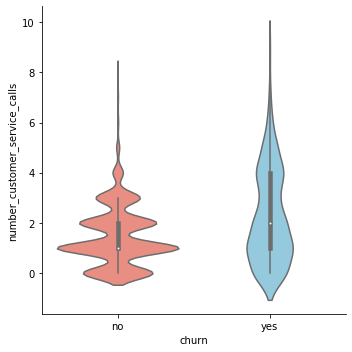

In [35]:
sns.catplot(x='churn', y='number_customer_service_calls', data=data, kind='violin', palette=colors);

In [36]:
data.drop(labels=cols_to_drop,
         axis='columns',
         inplace=True)

## Pré processamento

In [37]:
data.head()

,state,international_plan,total_day_minutes,total_day_charge,number_customer_service_calls,churn
index,,,,,,
1,KS,no,265.1,45.07,1,no
2,OH,no,161.6,27.47,1,no
3,NJ,no,243.4,41.38,0,no
4,OH,yes,299.4,50.90,2,no
5,OK,yes,166.7,28.34,3,no


### Dummie Variables

A fim de evitar que alguns dos algorítmos de Machine Learning atribuam maior peso para determinadas variáveis, vamos transformar as variáveis categóricas em variáveis binárias:

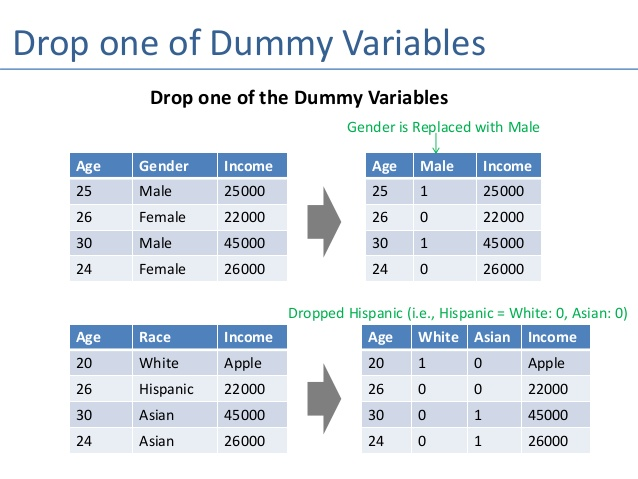

In [38]:
from IPython.display import Image
Image("dummie_var.jpg")

In [39]:
categorical_cols = ['state', 'international_plan']

dummies = pd.DataFrame()
for col in categorical_cols:
    dummies = pd.concat([dummies, pd.get_dummies(data[col], drop_first=True, prefix=col)], axis='columns')

In [40]:
data = pd.concat([data, dummies], axis='columns')

data.drop(labels=categorical_cols, axis='columns', inplace=True)

data.columns

Index(['total_day_minutes', 'total_day_charge',
       'number_customer_service_calls', 'churn', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'international_plan_yes'],
      dtype='object')

Por último, vamos dividir os dados em variáveis preditoras (x) e variável alvo (y).

In [41]:
x = data.drop(labels=['churn'], axis='columns')
y = data.churn

## Machine Learning

Na etapa de Machine Learning iremos testar quatro modelos diferentes e escolher o que apresentar a melhor acurácia média. Os modelos serão o de Random Forest, Naive Bayes, Support Vector Machines e Logistic Regression.

Vale ressaltar que iremos usar a técnica de Cross Validation para separar os dados entre diversos conjuntos de dados de treino e dados de testes. (Imagem explicativa sobre Cross Validation na célula abaixo)

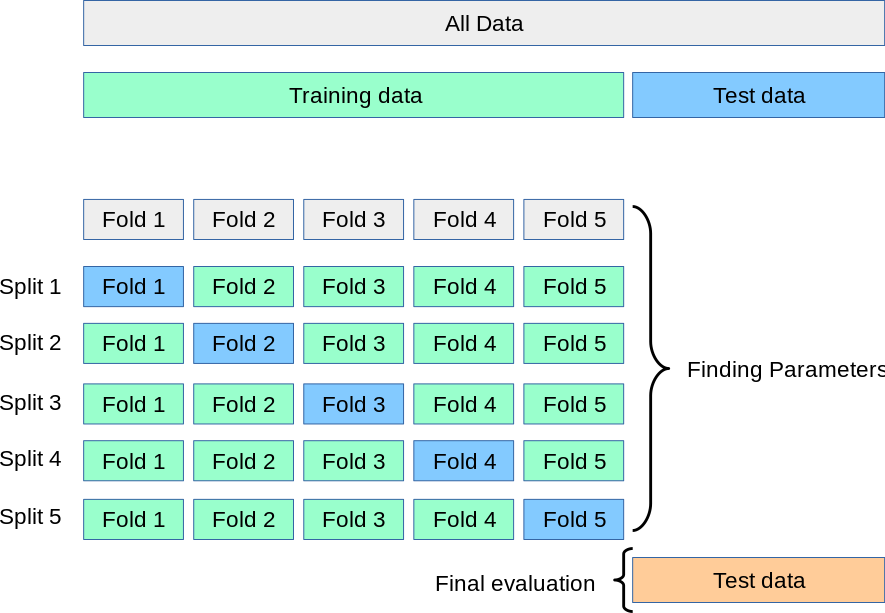

In [42]:
Image("cross_val.png")

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
cross_val_score(model, x, y, cv=10).mean()

0.8703997410584237

In [55]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
cross_val_score(nb_model, x, y, cv=10).mean()

0.5949704195213177

In [69]:
from sklearn.svm import SVC

svm_model = SVC()
cross_val_score(svm_model, x, y, cv=10).mean()

0.8691940443437449

In [67]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
cross_val_score(log_reg_model, x, y, cv=10).mean()

0.8553856251461042

Com pouco mais de 87% de acurácia, o modelo Random Forest foi escolhido para este problema.